Replicate Eduardo's C++ results from 10/2

In [1]:
import numpy as np
from CTRNNclass import *
from rateofchangefitness import *
from SampleGenerators import randomCTRNNsample
from HPevolution import *
from acceptance import *

In [2]:
dt = .025
HPgenome3 = np.array([.1,.1,.1,.9,.9,.9,40,20,12/dt])            #3 neurons
HPgenome4 = np.array([.1,.1,.1,.1,.9,.9,.9,.9,40,20,12/dt])      #4 neruons
HPgenome5 = np.array([.1,.1,.1,.1,.1,.9,.9,.9,.9,.9,40,20,12/dt])#5 neurons

In [3]:
popsize = 50
CTRNNsample = randomCTRNNsample(3,popsize,1)

The new protocol for evaluating fitness: 
- For each “global temperature” between -1 and 1 in steps of 0.1, I repeat the following steps:  
- Create CTRNN and set parameters according to the genotype-phenotype encoding
- Alter the biases and weights according to the global temperature T, p* = p + T
- Initialize state of all neurons by setting their output to 0.5
- Let transients pass for 200 units of time without HP.
- Evaluate performance for 200 units of time without HP 
- Turn HP mechanism on. 

- *Could add:* 200 units of transient time with HP on


- Evaluate performance for 200 units of time with HP on. 

In [4]:
temp_range = [-1,1]
temp_step = .1
temp_direction = np.ones(N**2+(2*N))

def fitnessfunc(neurongenome):
    fitness = 0
    templist = np.arange(temp_range[0],temp_range[1],temp_step)
    for temp in templist:
        CTRNNgenome = neurongenome + temp_direction*temp
        fitness += roc_fitness2(neurongenome,HPgenome3)
    return fitness/len(templist)

In [5]:
generations = 20
recombprob = .25
mutatprob = .25

M = MicrobialCTRNN(fitnessfunc,CTRNNsample,recombprob,mutatprob,generations)
M.run()

print('Success')


In [ ]:
bestind = M.pop[np.argmax(M.fitness)]

C = CTRNN(3,dt,1000,HPgenome3,bestind)
for i in range(len(C.time)):
    C.ctrnnstep(1)


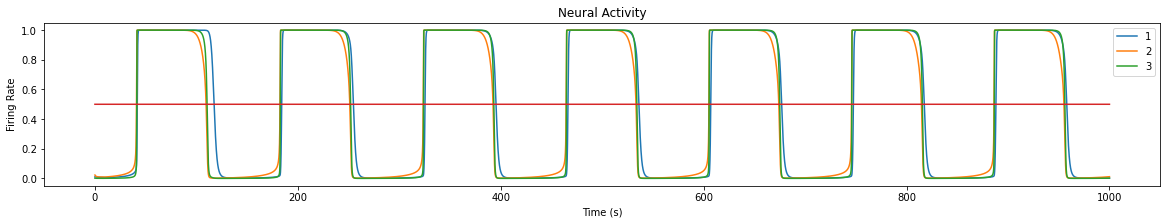

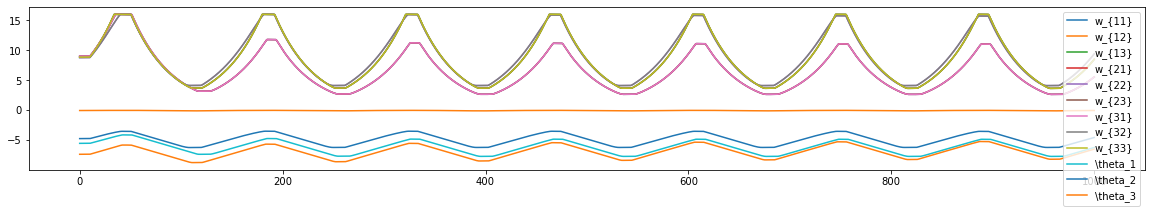

In [ ]:
C.plot()
plt.show()
C.plotparams()

In [ ]:
accepthistory = np.zeros(generations)

for i in range(generations):
    accepthistory[i]=acceptance(HPgenome3,M.bestindHistory[i])

print(accepthistory)

AttributeError: 'MicrobialCTRNN' object has no attribute 'bestindHistory'